# torch.nn 实现二维卷积

## 在车辆数据集上实现

In [141]:
import os
from os import listdir
from os.path import join
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import torchvision
import torch.optim as optim
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils import data

In [142]:
class ConvModule(nn.Module):
    def __init__(self):
        super(ConvModule,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True)
        )
        self.fc = nn.Linear(128,num_classes)
    def forward(self,X):
        out = self.conv(X)
        out = F.avg_pool2d(out,26)
        out = out.squeeze()
        out = self.fc(out)
        return out

In [143]:
def train_epoch(net,data_loader,device):
    net.train()
    train_batch_num = len(data_loader)
    total_loss = 0
    correct = 0
    sample_num = 0
    for batch_idx,(data,target) in enumerate(data_loader):
        data = data.to(device).float()
        target = target.to(device).long()
        optimizer.zero_grad()
        output = net(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        prediction = torch.argmax(output,1)
        correct += (prediction == target).sum().item()
        sample_num += len(prediction)
    loss = total_loss / train_batch_num
    acc = correct / sample_num
    return loss,acc

In [144]:
def test_epoch(net,data_loader,device):
    net.eval()
    test_batch_num = len(data_loader)
    total_loss = 0
    correct = 0
    sample_num = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):
            data = data.to(device).float()
            target = target.to(device).long()
            output = net(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            prediction = torch.argmax(output, 1)
            correct += (prediction == target).sum().item()
            sample_num += len(prediction)
    loss = total_loss / test_batch_num
    acc = correct / sample_num
    return loss, acc

In [145]:
path_train = r'./车辆分类数据集/train/'  # 路径
path_test = r'./车辆分类数据集/test/'  # 路径

train = torchvision.datasets.ImageFolder(path_train, transform=transforms.Compose(
    [transforms.Resize((32, 32)), transforms.CenterCrop(32), transforms.ToTensor()]))
test =torchvision.datasets.ImageFolder(path_test, transform=transforms.Compose(
    [transforms.Resize((32, 32)), transforms.CenterCrop(32), transforms.ToTensor()]))

In [146]:
classes = ('bus','car','truck')
num_classes = 3
epochs = 100
lr = 0.0001
batch_size = 512
device=torch.device("cpu")
train_loader = torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=True,num_workers=0)
test_loader = torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=True,num_workers=0)

In [147]:
net = ConvModule().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=lr)
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
begin = time.time()
for epoch in range(epochs):
    train_loss, train_acc = train_epoch(net, data_loader=train_loader,device=device)
    test_loss, test_acc = test_epoch(net, data_loader=test_loader, device=device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    if (epoch+1)%20==0:
        print(f"epoch:{epoch+1}\t train_loss:{train_loss:.5f}\t"
              f"train_acc:{train_acc:.5f}\t"
              f"test_loss:{test_loss:.5f}\t test_acc:{test_acc:.5f}")

epoch:20	 train_loss:0.61493	train_acc:0.81475	test_loss:0.61291	 test_acc:0.80515
epoch:40	 train_loss:0.48357	train_acc:0.84700	test_loss:0.49353	 test_acc:0.85294
epoch:60	 train_loss:0.42138	train_acc:0.85806	test_loss:0.46956	 test_acc:0.84926
epoch:80	 train_loss:0.37835	train_acc:0.86820	test_loss:0.40967	 test_acc:0.86029
epoch:100	 train_loss:0.34839	train_acc:0.89032	test_loss:0.38167	 test_acc:0.87868


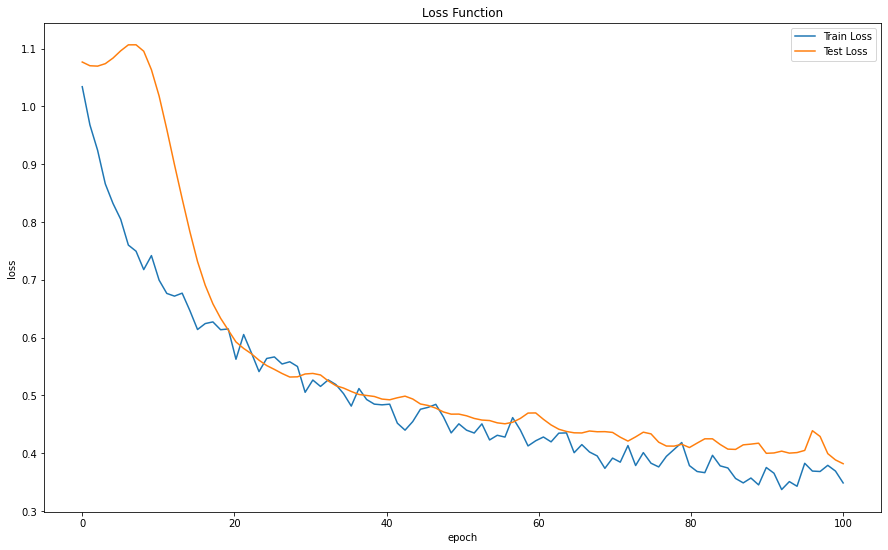

In [148]:
def Draw_Loss_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss Function")
    x_loss = np.linspace(0, len(train_loss_list), len(train_loss_list))
    plt.plot(x_loss, train_loss_list, label=u'Train Loss', linewidth=1.5)
    plt.plot(x_loss, test_loss_list, label=u'Test Loss', linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Loss_Curve()

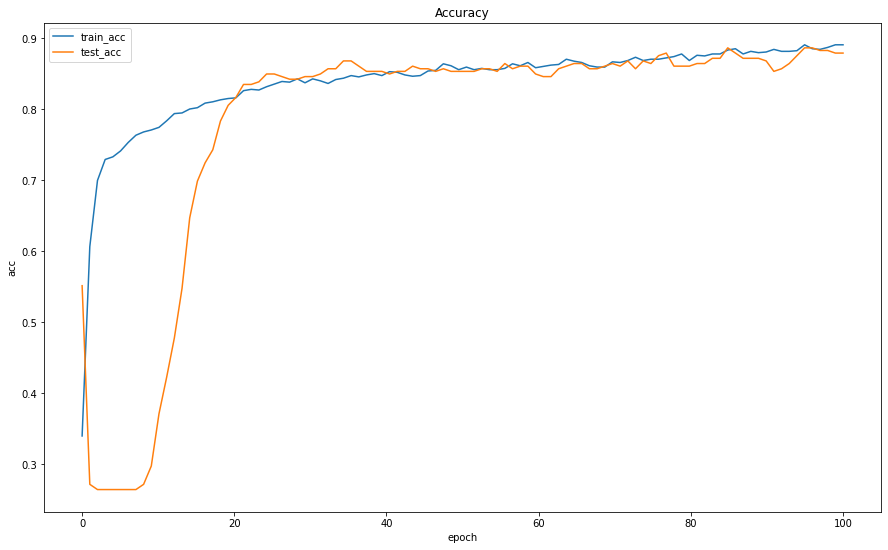

In [149]:
def Draw_Acc_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("acc")
    plt.title("Accuracy")
    x_acc = np.linspace(0, len(train_acc_list), len(train_acc_list))
    plt.plot(x_acc, train_acc_list, label="train_acc", linewidth=1.5)
    plt.plot(x_acc, test_acc_list, label="test_acc", linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Acc_Curve()

In [150]:
end = time.time()
print(end-begin)

784.701150894165


## 在去雾数据集上实现

In [151]:
import os
from os import listdir
from os.path import join
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import torchvision
import torch.optim as optim
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils import data

In [152]:
class ConvModule(nn.Module):
    def __init__(self):
        super(ConvModule,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True)
        )
        self.refine = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=3, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(3),
            nn.ReLU()
        )
#         self.fc = nn.Linear(128,num_classes)
    def forward(self,X):
        out = self.conv(X)
#         out = F.avg_pool2d(out,26)
        out = self.refine(out)
#         out = out.squeeze()
#         out = self.fc(out)
        return out

In [153]:
def cal_ssim(img_pre,img_gt):
    img_gt_u = np.mean(img_gt)
    img_pre_u = np.mean(img_pre)
    img_gt_var = np.var(img_gt)
    img_pre_var = np.var(img_pre)
    img_gt_std = np.sqrt(img_gt_var)
    img_pre_std = np.sqrt(img_pre_var)
    c1 = np.square(0.01 * 7)
    c2 = np.square(0.03 * 7)
    ssim_0 = (2 * img_gt_u * img_pre_u + c1) * (2 * img_gt_std * img_pre_std + c2)
    denom = (img_gt_u ** 2 + img_pre_u ** 2 + c1) * (img_gt_var + img_pre_var + c2)
    ssim = ssim_0 / denom
    return ssim

In [154]:
def train_epoch(net,data_loader,device):
    net.train()
    train_batch_num = len(data_loader)
    total_loss = 0
    correct = 0
    sample_num = 0
    for batch_idx,(data,target) in enumerate(data_loader):
        data = data.to(device).float()
        target = target.to(device).float()
        optimizer.zero_grad()
        output = net(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += cal_ssim(output.detach().numpy(),target.detach().numpy())
        sample_num += 1 
    loss = total_loss / train_batch_num
    ssim = correct / sample_num
    return loss,ssim

In [155]:
def test_epoch(net,data_loader,device):
    net.eval()
    test_batch_num = len(data_loader)
    total_loss = 0
    correct = 0
    sample_num = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):
            data = data.to(device).float()
            target = target.to(device).float()
            output = net(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            correct += cal_ssim(output.detach().numpy(),target.detach().numpy())
            sample_num += 1 
    loss = total_loss / test_batch_num
    ssim = correct / sample_num
    return loss,ssim

### 划分训练集和测试集（8:2）

In [156]:
def is_image_file(filename):
    return any(filename.endswith(extension) for extension in [".png", ".jpg", ".jpeg"])

In [157]:
image_dirs = [r'./去雾数据集/去雾图片/',r'./去雾数据集/有雾图片/']
train_list = []
test_list = []
for image_dir in image_dirs:
    image_filenames = [join(image_dir, x) for x in listdir(image_dir) if is_image_file(x)]
    list_len = len(image_filenames)
    for id, image_filename in enumerate(image_filenames):
        if (id + 1) / list_len <= 0.8:
            train_list.append(image_filename)
        else:
            test_list.append(image_filename)

In [158]:
print(len(train_list))

832


In [159]:
print(len(test_list))

208


In [160]:
for image in train_list:
    img = Image.open(image)
    filename = image.split('/')[-1]
    subdirectory = image.split('/')[-2]
    if '去雾图片' in subdirectory:
        prefix = 'gt/' 
    else:
        prefix = 'input/'
    img.save(r'./去雾数据集/train/'+prefix+filename)

for image in test_list:
    img = Image.open(image)
    filename = image.split('/')[-1]
    subdirectory = image.split('/')[-2]
    if '去雾图片' in subdirectory:
        prefix = 'gt/' 
    else:
        prefix = 'input/'
    img.save(r'./去雾数据集/test/'+prefix+filename)

In [161]:
def load_img(filepath):
    img = Image.open(filepath)
    return img

In [170]:
path_train = r'./去雾数据集/train/'  # 路径
path_test = r'./去雾数据集/test/'  # 路径


class DatasetFromFolder(data.Dataset):
    def __init__(self, image_dir, gt_dir, input_transform=None, target_transform=None):
        super(DatasetFromFolder, self).__init__()
        self.image_filenames = [join(image_dir, x) for x in listdir(image_dir) if is_image_file(x)]
        self.gt_dir = gt_dir
        self.input_transform = input_transform
        self.target_transform = target_transform

    def __getitem__(self, index):
        input = load_img(self.image_filenames[index])

        _, file = os.path.split(self.image_filenames[index])  # dir,filename

        target = load_img(os.path.join(self.gt_dir, os.path.splitext(file)[0] + '.jpg'))
        
        if self.target_transform:
            target = self.target_transform(target)

        if self.input_transform:
            input = self.input_transform(input)

        return input, target

    def __len__(self):
        return len(self.image_filenames)

def input_transform():
    return transforms.Compose([transforms.Resize((32, 32)), transforms.CenterCrop(32), transforms.ToTensor()])

def target_transform():
    return transforms.Compose([transforms.Resize((32, 32)), transforms.CenterCrop(32), transforms.ToTensor()])

train = DatasetFromFolder(path_train+'input/', path_train+'gt/',
                             input_transform=input_transform(),
                             target_transform=target_transform())
test = DatasetFromFolder(path_test+'input/', path_test+'gt/',
                             input_transform=input_transform(),
                             target_transform=target_transform())

In [163]:
epochs = 100
lr = 0.0001
batch_size = 512
device=torch.device("cpu")
train_loader = torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=True,num_workers=0)
test_loader = torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=True,num_workers=0)

In [164]:
print(len(train))

416


In [165]:
print(len(test))

104


In [166]:
net = ConvModule().to(device)
criterion = nn.L1Loss()
optimizer = optim.Adam(net.parameters(),lr=lr)
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
begin = time.time()
for epoch in range(epochs):
    train_loss,train_ssim = train_epoch(net, data_loader=train_loader,device=device)
    test_loss,test_ssim = test_epoch(net, data_loader=test_loader, device=device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_ssim)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_ssim)
    if (epoch+1)%20==0:
        print(f"epoch:{epoch+1}\t train_loss:{train_loss:.5f}\t"
              f"train_ssim:{train_ssim:.5f}\t"
              f"test_loss:{test_loss:.5f}\t" f"test_ssim:{test_ssim:.5f}\t")

epoch:20	 train_loss:0.18927	train_ssim:0.95013	test_loss:0.29367	test_ssim:0.48886	
epoch:40	 train_loss:0.13948	train_ssim:0.96678	test_loss:0.17758	test_ssim:0.90711	
epoch:60	 train_loss:0.12613	train_ssim:0.96864	test_loss:0.13219	test_ssim:0.96063	
epoch:80	 train_loss:0.12015	train_ssim:0.97001	test_loss:0.12280	test_ssim:0.96674	
epoch:100	 train_loss:0.11610	train_ssim:0.97148	test_loss:0.11835	test_ssim:0.96930	


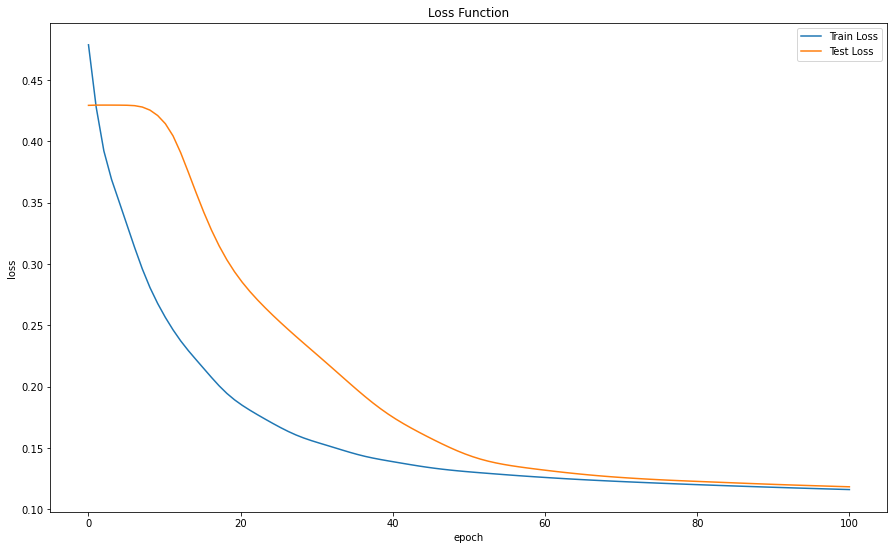

In [167]:
def Draw_Loss_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss Function")
    x_loss = np.linspace(0, len(train_loss_list), len(train_loss_list))
    plt.plot(x_loss, train_loss_list, label=u'Train Loss', linewidth=1.5)
    plt.plot(x_loss, test_loss_list, label=u'Test Loss', linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Loss_Curve()

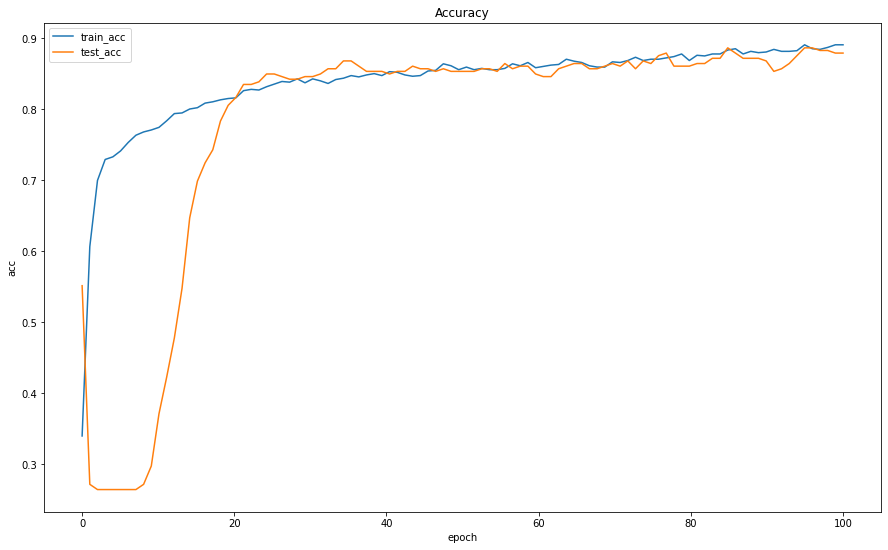

In [168]:
def Draw_Acc_Curve():
    plt.figure(figsize=(15, 9))
    plt.xlabel("epoch")
    plt.ylabel("acc")
    plt.title("Accuracy")
    x_acc = np.linspace(0, len(train_acc_list), len(train_acc_list))
    plt.plot(x_acc, train_acc_list, label="train_acc", linewidth=1.5)
    plt.plot(x_acc, test_acc_list, label="test_acc", linewidth=1.5)
    plt.legend()
    plt.show()
Draw_Acc_Curve()

In [169]:
end = time.time()
print(end-begin)

845.0422718524933
